# Deep Image Distortion Visibility
Implementation of paper "Learning Local Distortion Visibility from Image Quality"
* Cite: N. K. Kottayil, G. Valenzise, F. Dufaux and I. Cheng, "Learning Local Distortion Visibility from Image Quality," in IEEE International Conference on Image Processing, (accepted).
* Pre-print: [arXiv link](https://arxiv.org/abs/1803.04053)

## Main Contents
* test.py : Usage example for evaluation of the quality of any provided HDR image.
* main.py : Example code to reproduce results in paper. 
* model.py: Model definitions and training script.
* data_utils.py : Helper functions required for training.
* \weights : Trained weights for dataset in paper.
* \tmp : Visualizations


## Demo

This example shows how to generate an error detection threshold map from any given image. All image distortions below the detected theshold will be barely visible to the human eyes.

D:\Programs\Anaconda\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


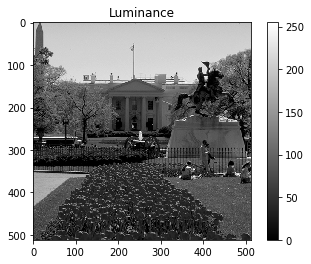

In [1]:
from model import *
import cv2

fname = "D:\Documents\PhD\LDR datasets\CSIQ\\1600.png"
img = get_luminance(cv2.imread(fname))
# Write the image here for easy comparisons
cv2.imwrite("tmp\\clean.bmp", np.uint8( img) )
plt.imshow( img,cmap='gray' )
plt.title("Luminance")
plt.colorbar()
plt.show()

Determining the visibility threhsolds. 

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


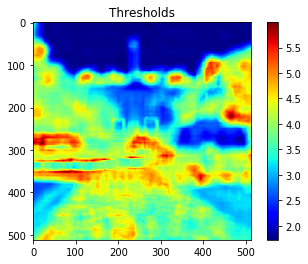

In [2]:
qmodel  = model_deep_vis(load_weights=1)
fmap = qmodel.get_thresh(img)
fmap = cv2.resize(fmap, img.shape)
plt.imshow(fmap,cmap='jet')
plt.title('Thresholds')
plt.colorbar()
plt.show()

In the map above, information in areas of low visibility thresholds is easily seen by the human eyes and those in high visibility thresholds are difficult to see. Here, it looks like thresholds for the sky is around 1.5 and for the grass is around 4.

## Simple use case

We now demonstrate a possible use case of hiding some watermarks usign our approach. Let us add some simple messages (acting as distortions here) and scale the values to a maximum intensity of 4. Note that the 'distortion' here is the message as shown below.

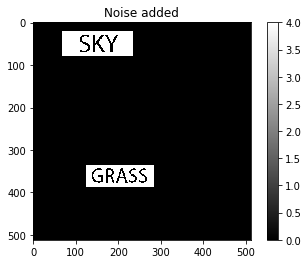

In [3]:
noise = np.mean( cv2.imread("tmp\\noiseadd.bmp"), axis = 2 )/255.0*4
plt.imshow(noise, cmap='gray')
plt.title("Noise added")
plt.colorbar()
plt.show()

Now we add this message to the original image and see the results.

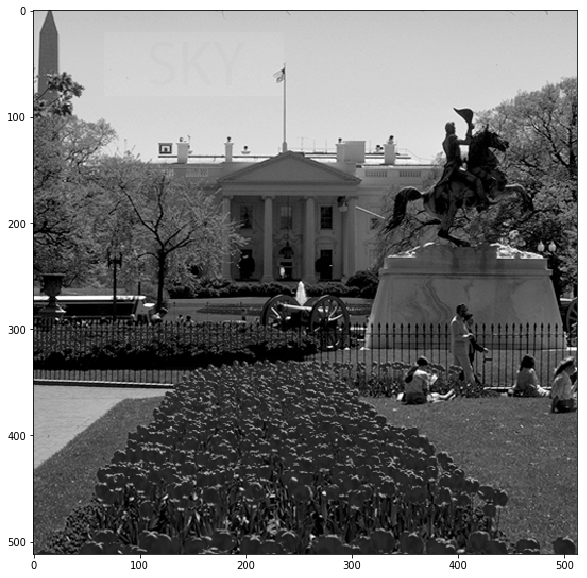

True

In [4]:
plt.figure(figsize = (10,10))
plt.imshow(img+noise, cmap = 'gray')
plt.show()
cv2.imwrite("tmp\\noisy1.bmp", np.uint8( np.clip(img+noise, 0, 255)) )

Since the distortion was scaled to have maximum of 4 (more than the visibility threhsolds in the sky), it is visible; but distortion intensity of 4 is below the visibility theshold of the grass. So our message is not visible in the grass.

Now to hide the distortion in the sky, we can scale the noise to a value that is less than 1.5. And we can add this back to the original image.

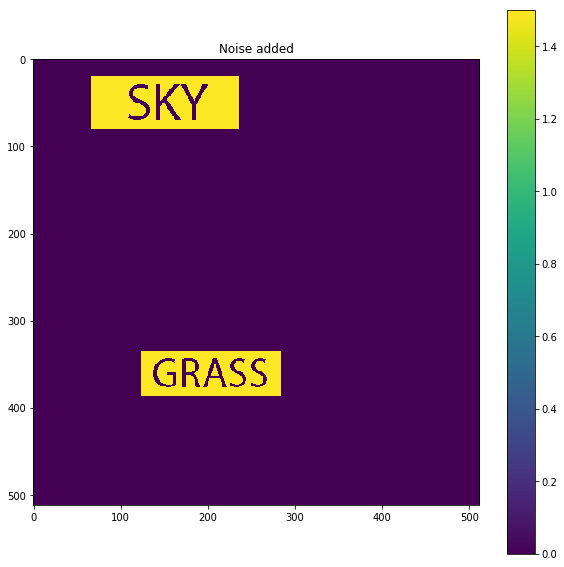

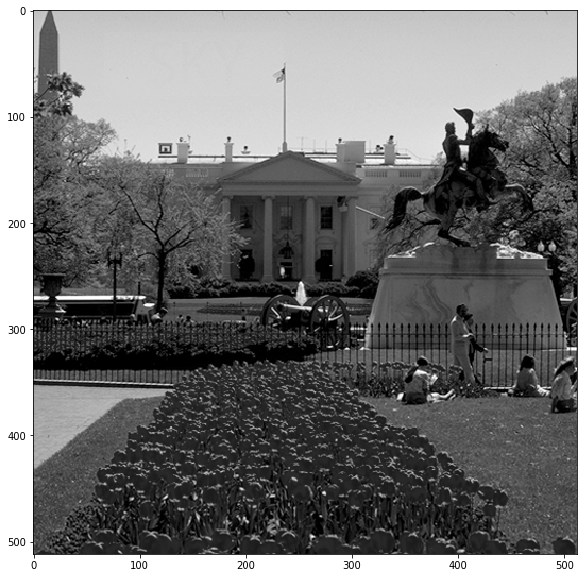

True

In [7]:
noise2  = np.mean( cv2.imread("tmp\\noiseadd.bmp"), axis = 2 )/255.0*1.5
plt.imshow(noise2)
plt.title("Noise added")
plt.colorbar()
plt.show()
plt.figure(figsize = (10,10))
plt.imshow(img+noise2, cmap = 'gray')
plt.show()
cv2.imwrite("tmp\\noisy2.bmp", np.uint8( np.clip(img+noise2, 0, 255) ) )

Now the information in the sky is barely detectable. 